# Proyek Analisis Data: Bike Sharing
- **Nama:** Ahmad Zakaria
- **Email:** aryazakaria67@gmail.com
- **ID Dicoding:** ahmad_zakaria_V0sa

## Menentukan Pertanyaan Bisnis

1. Bagaimana suhu mempengaruhi penyewaan sepeda di musim yang berbeda?
2. Kapan waktu puncak penyewaan sepeda setiap harinya?
3. Apakah libur nasional (holiday) meningkatkan atau menurunkan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

<i> Import dataset day dan hour, serta mengecek head dari keduanya dan membuat merge dari day dan hour

In [10]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
hour_df = pd.read_csv("data/hour.csv", delimiter=",")

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
merged_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",  
    right_on="dteday" 
)
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Assessing Data


<i> Mencari Missing Value

In [25]:
print("Day dataframe shape: ", day_df.shape)
day_df.isna().sum()

Day dataframe shape:  (731, 16)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [50]:
print ("Hour Dataframe : ", hour_df.shape)
hour_df.isna().sum()

Hour Dataframe :  (17379, 17)


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
print("Mergerd Dataframe : " , merged_df.shape)
merged_df.isna().sum()


Mergerd Dataframe :  (17379, 32)


instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

Cek Duplicate Data

In [29]:
print("Day duplicates: ", day_df.duplicated().sum())
print("Hour duplicates: ", hour_df.duplicated().sum())
print("Merged duplicates: ", merged_df.duplicated().sum())

Day duplicates:  0
Hour duplicates:  0
Merged duplicates:  0


**Insight:**
- Missing Value : Kedua dataset baik itu hour ataupun day tidak memiliki nilai yang null atau kosong
- Duplicate Data : Tidak ada data duplikat dalam kedua dataset yang ada

### Cleaning Data

<i> Melihat informasi dari day_df

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<i> Melihat informasi dari hour_df

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<i> Merubah tipedata dari dteday dari object ke datetime64

In [36]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<i> Mengecek tipe data setelah diubah

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sebelumnya kita sudah cek untuk nilai null atau NaN dan ternyata tidak ada
- Kita juga menemukan tidak ada data duplikat dalam kedua dataset
- Namun setelah dicek mengenai informasi dari kedua dataset terdapat tipe data yang tidak sesuai yaitu di dteday yang bertipe data object, kita harus mengubahnya menjadi tipe data yang benar jadi kita rubah kedalam tipe data datetime64

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

In [38]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


1. Dataset day
- Jumlah data: 731 entri, menunjukkan 731 hari dalam dataset.
- Musim paling umum: Musim panas dengan nilai rata-rata mendekati 2.5
- Tahun dominan: Dataset mencakup dua tahun (2011 dan 2012), dengan pembagian yang merata
- Bulan paling umum: Bulan Juli (mnth = 7), yang terlihat dari distribusi median yang berada di tengah-tengah tahun.
- Hari libur: Hari libur hanya mencakup sekitar 2.87% dari data, menunjukkan bahwa sebagian besar hari bukan hari libur.
- Hari kerja: Sekitar 68.4% dari total hari adalah hari kerja (workingday = 0.684), mengindikasikan bahwa rental sepeda cenderung terjadi pada hari-hari kerja.
- Kondisi cuaca: Cuaca rata-rata berada pada kategori baik (weathersit = 1)
- Suhu rata-rata: Suhu rata-rata (temp = 0.495 atau sekitar 41°C setelah di-skala ulang), dan suhu perasaan rata-rata (atemp = 0.474 atau sekitar 50°C setelah di-skala ulang).
- Kelembaban rata-rata: Kelembaban rata-rata sekitar 47% (hum = 0.47), yang cukup moderat.
- Kecepatan angin: Rata-rata kecepatan angin sekitar 19% dari maksimal, yang menunjukkan kondisi angin yang ringan hingga sedang
- Pengguna kasual: Rata-rata sekitar 848 pengguna kasual per hari, dengan maksimum 3410 pengguna pada hari tersibuk.
- Pengguna terdaftar: Rata-rata 3656 pengguna terdaftar per hari, menunjukkan bahwa pengguna terdaftar merupakan mayoritas dibandingkan pengguna kasual.
- Total rental: Rata-rata sekitar 4504 total rental sepeda per hari, dengan maksimum 8714 rental pada hari tersibuk.

In [41]:
day_df.groupby(by="registered").instant.nunique().sort_values(ascending=False)

registered
6248    3
1707    3
4841    3
3248    2
3413    2
       ..
3077    1
3084    1
3100    1
3102    1
6946    1
Name: instant, Length: 679, dtype: int64

Berdasarkan hasil diatas dapat dilihat bahwa pengguna terdaftar sebanyak 6248 muncul sebanyak 3 hari unik. Kemudian ada hari dimana pengguna terdaftar sebanyak 1707 muncul sebanyak 3 hari unik. Dan seterusnya, dengan daftar grup yang diurutkan berdasarkan jumlah hari unik.
Ada 679 nilai yang berbeda di dalam kolom registered

### Explore Dataset Hour

In [39]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


2. Dataset hour
- Jumlah data: 17,379 entri, menunjukkan data per jam selama periode dataset.
- Musim paling umum: Musim panas dengan nilai rata-rata mendekati 2.5.
- Tahun dominan: Dataset mencakup dua tahun (2011 dan 2012) dengan pembagian yang merata.
- Bulan paling umum: Bulan Juli (mnth = 7), terlihat dari distribusi median.
- Hari libur: Hari libur hanya mencakup sekitar 2.87% dari data.
- Hari kerja: Sekitar 68.3% dari total jam adalah jam kerja.
- Kondisi cuaca: Cuaca rata-rata berada pada kategori baik (weathersit = 1).
- Suhu rata-rata: Suhu rata-rata (temp = 0.497 atau sekitar 42°C setelah di-skala ulang), dan suhu perasaan rata-rata (atemp = 0.476 atau sekitar 51°C).
- Kelembaban rata-rata: Kelembaban rata-rata sekitar 47.6%.
- Kecepatan angin: Rata-rata kecepatan angin sekitar 19% dari maksimal.
- Pengguna kasual: Rata-rata sekitar 36 pengguna kasual per jam, dengan maksimum 367.
- Pengguna terdaftar: Rata-rata sekitar 154 pengguna terdaftar per jam.
- Total rental: Rata-rata sekitar 189 rental sepeda per jam, dengan maksimum 977 rental.

In [42]:
day_df.groupby(by="casual").instant.nunique().sort_values(ascending=False)

casual
968     4
120     4
639     3
653     3
140     3
       ..
551     1
550     1
548     1
547     1
3410    1
Name: instant, Length: 606, dtype: int64

Kemudian untuk hasil dari dataset hour  dapat dilihat bahwa pengguna kasual sebanyak 968 muncul sebanyak 4 hari unik. Kemudian ada hari dimana pengguna kasual sebanyak 120 muncul sebanyak 4 hari unik. Dan seterusnya, dengan daftar grup yang diurutkan berdasarkan jumlah hari unik.
Ada 606 nilai yang berbeda di dalam kolom registered

### Explore Dataset Hour dan Day

Rata-rata total rental sepeda per jam dalam sehari

In [58]:
merged_df.groupby(by="hr").cnt_x.mean().sort_values(ascending=False).reset_index().head(10)


,hr,cnt_x
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


Hasil : 
- Jam 17:00 memiliki rata-rata rental sepeda tertinggi.
- Jam 18:00 ada di urutan kedua.
- Jam 8:00 berada di urutan ke tiga sebagai jam dimana rata-rata rental sepeda tertinggi

In [59]:
merged_df.groupby(by="season_x").agg({
    "cnt_x": "sum", 
    "temp_x": ["max", "min", "mean", "std"],  
    "atemp_x": ["max", "min", "mean", "std"], 
    "hum_x": ["max", "min", "mean", "std"], 
    "windspeed_x": ["max", "min", "mean", "std"]
}).reset_index()


season_x    cnt_x temp_x                           atemp_x          \
                sum    max   min      mean       std     max     min   
0        1   471348   0.72  0.02  0.299147  0.118726  0.6515  0.0000   
1        2   918589   0.94  0.16  0.544663  0.139233  0.8788  0.1667   
2        3  1061129   1.00  0.38  0.706410  0.093903  1.0000  0.2424   
3        4   841613   0.76  0.14  0.423138  0.122167  0.6818  0.1515   

                      hum_x                           windspeed_x       \
       mean       std   max   min      mean       std         max  min   
0  0.298116  0.114405   1.0  0.00  0.581348  0.199403      0.8060  0.0   
1  0.520547  0.123376   1.0  0.16  0.627022  0.205364      0.7164  0.0   
2  0.656004  0.089505   1.0  0.16  0.633167  0.177866      0.8507  0.0   
3  0.415738  0.109336   1.0  0.16  0.667124  0.178149      0.6418  0.0   

                       
       mean       std  
0  0.215107  0.136914  
1  0.203410  0.117368  
2  0.171593  0.109354  
3  0.170819  0.118666

Berdasarkan data diatas :
- Musim panas (2) memiliki total penyewaan tertinggi (918,589), diikuti oleh musim gugur (3) dan musim dingin (4).
- Suhu tertinggi terjadi di musim panas (0.94), sementara suhu rata-rata terendah terjadi di musim semi (0.29).
- Kelembaban secara konsisten tinggi di semua musim, dengan sedikit variasi dalam nilai rata-rata (sekita 0.58 hingga 0.67).
- Kecepatan angin cenderung lebih tinggi di musim semi (max 0.806) dibandingkan musim lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu mempengaruhi penyewaan sepeda di musim yang berbeda ditiap harinya?

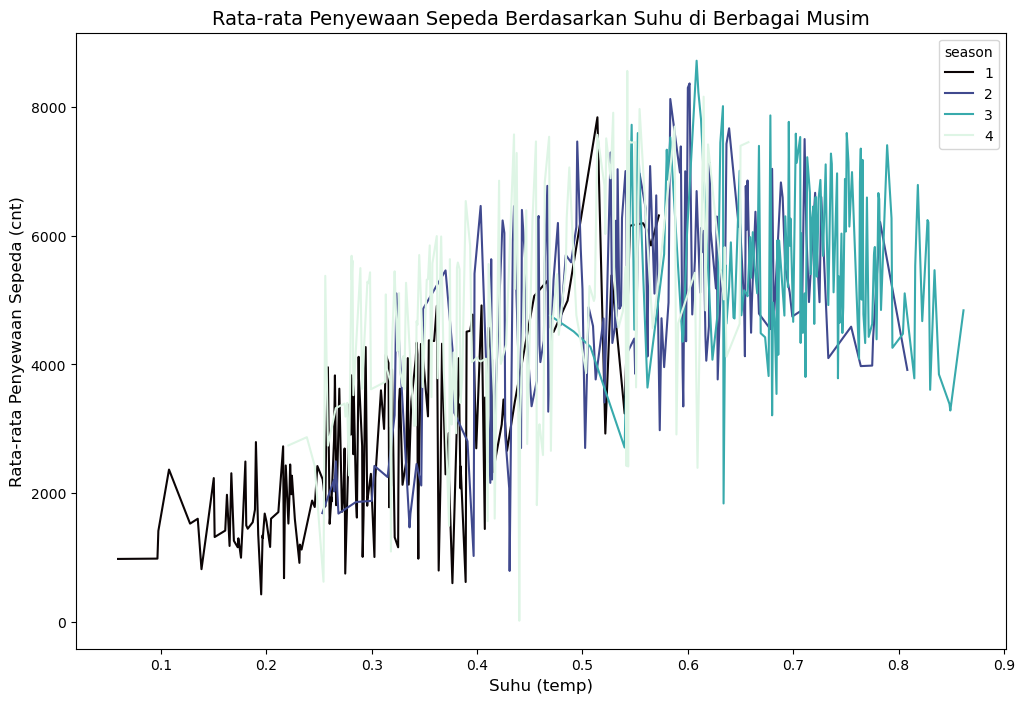

In [87]:
# Hitung rata-rata penyewaan sepeda berdasarkan suhu dan musim
season_temp = day_df.groupby(["season", "temp"])["cnt"].mean().reset_index()

# Buat line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=season_temp, x="temp", y="cnt", hue="season", palette="mako")

# Set judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Suhu di Berbagai Musim", fontsize=14)
plt.xlabel("Suhu (temp)", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda (cnt)", fontsize=12)

plt.show()


Season akan membagi data ke dalam 4 musim yang berbeda:
1.  Musim semi
2. Musim panas
3. Musim gugur
4. Musim dingin

- Musim panas menunjukkan peningkatan penyewaan sepeda dengan suhu yang lebih tinggi, hingga mencapai titik optimal, sebelum menurun ketika suhu menjadi terlalu tinggi.
- Musim dingin bisa menunjukkan hubungan yang berbeda, di mana penyewaan sepeda lebih sedikit pada suhu yang lebih rendah, tetapi penyewaan akan meningkat sedikit ketika suhu berubah menjadi lebih hangat.
- Musim semi dan gugur mungkin memiliki pola yang mirip dengan musim panas tetapi dalam skala yang lebih rendah.

### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda setiap harinya?

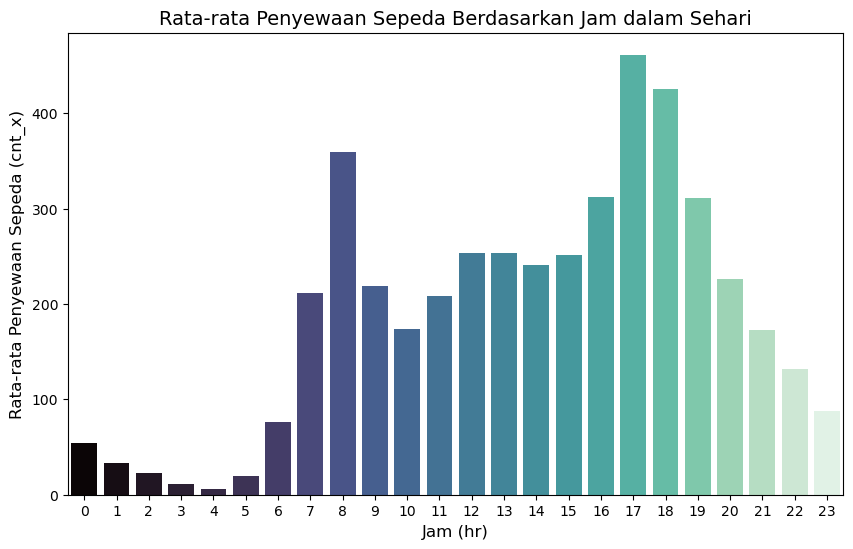

In [93]:


hourly_data = merged_df.groupby("hr")["cnt_x"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_data, x="hr", y="cnt_x", palette="mako", legend=False, hue="hr")

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam (hr)", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda (cnt_x)", fontsize=12)

plt.xticks(ticks=range(0, 24))
plt.show()


Berdasarkan visualisasi data diatas dapat disimpulkan bahwa :
1. Pagi hari : Kita mungkin melihat lonjakan pada jam-jam pagi terutama jam 8, yang terkait dengan jam berangkat kerja atau sekolah.
2. Sore hari : Kemudian, juga terjadi lonjakan lainnya pada sore hari diantara jam 5 hingga 7, yang bisa menunjukkan waktu pulang kerja
3. Tengah malam dan dini hari: Penyewaan sepeda biasanya lebih rendah pada tengah malam hingga dini hari dikarenakan minimnya aktifitas pada jam tersebut.

### Apakah libur nasional (holiday) meningkatkan atau menurunkan penyewaan sepeda?

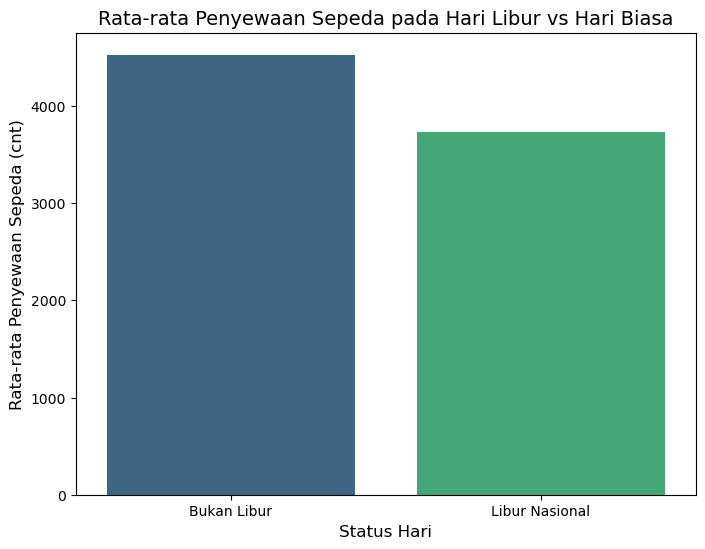

In [90]:


holiday_rentals = day_df.groupby("holiday")["cnt"].mean().reset_index()
holiday_rentals["holiday"] = holiday_rentals["holiday"].map({0: "Bukan Libur", 1: "Libur Nasional"})

plt.figure(figsize=(8, 6))
sns.barplot(x="holiday", y="cnt", data=holiday_rentals, palette="viridis", hue="holiday")
plt.title("Rata-rata Penyewaan Sepeda pada Hari Libur vs Hari Biasa", fontsize=14)
plt.xlabel("Status Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda (cnt)", fontsize=12)

plt.show()


Berdasarkan apa yang menjadi hasil diatas ternyata hari libur nasional atau holiday justru menurunkan jumlah angka penyewaan sepeda

## Conclusion

1. <b>Conclution "Bagaimana suhu mempengaruhi penyewaan sepeda di musim yang berbeda?"</b>
    
    Dari hasil di atas, dapat disimpulkan bahwa pola penyewaan sepeda berubah-ubah sesuai dengan musim dan suhu:

    - Musim panas: Penyewaan sepeda mengalami peningkatan seiring dengan suhu yang lebih tinggi, mencapai puncaknya pada suhu optimal. Namun, jika suhu terlalu panas, penyewaan mulai menurun

    - Musim dingin: Penyewaan sepeda cenderung lebih rendah karena suhu dingin. Namun, jika suhu sedikit menghangat, akan ada sedikit peningkatan dalam penyewaan, walaupun tetap lebih rendah dibandingkan musim lainnya

    - Musim semi dan musim gugur: Kedua musim ini menunjukkan hal yang mirip dengan musim panas, namun dengan tingkat penyewaan yang lebih rendah. Peningkatan penyewaan masih terjadi seiring dengan suhu yang hangat, meskipun tidak sekuat di musim panas

    Secara keseluruhan, penyewaan sepeda dipengaruhi oleh suhu, dengan variasi tergantung musim. Musim panas cenderung paling optimal untuk penyewaan, sementara musim dingin memiliki permintaan yang paling rendah
2. <b>Kapan waktu puncak penyewaan sepeda setiap harinya?</b>
    
    Dari pernyataan di atas, dapat disimpulkan bahwa pola penyewaan sepeda juga dipengaruhi oleh waktu dalam sehari:

    - Pagi hari (terutama jam 8): Ada lonjakan signifikan pada penyewaan sepeda di jam pagi, terutama sekitar jam 8. Ini disebabkan oleh orang-orang yang menggunakan sepeda untuk berangkat kerja atau sekolah, sehingga menciptakan tingginya rental sepeda

    - Sore hari (antara jam 5 hingga 7): Lonjakan lain terjadi pada sore hari, antara jam 5 hingga 7, yang berhubungan dengan waktu pulang kerja atau sekolah. Ini menunjukkan bahwa sepeda juga menjadi moda transportasi untuk pulang kerja maupun pulang sekolah

    - Tengah malam hingga dini hari: Penyewaan sepeda cenderung rendah selama periode ini, yaitu dari tengah malam hingga dini hari. Hal ini disebabkan oleh minimnya aktivitas pada waktu tersebut, di mana orang-orang cenderung beristirahat dan tidak beraktivitas di luar rumah.

    Secara keseluruhan, pola penyewaan sepeda mengikuti rutinitas harian, dengan dua puncak utama di pagi dan sore hari, serta penurunan signifikan pada malam hingga dini hari.

3. <b>Apakah libur nasional (holiday) meningkatkan atau menurunkan penyewaan sepeda?</b>

    Berdasarkan apa yang menjadi hasil diatas ternyata hari libur nasional atau holiday justru menurunkan jumlah angka penyewaan sepeda diakrenakan kemungkinan banyak orang lebih memilih untuk tetap istirahat selama waktu libur daripada berkegiatan diluar rumah